In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()


True

In [17]:
model = ChatOpenAI()

In [ ]:
# create a state
class LLMState(TypedDict):
    question: str
    answer: str

In [ ]:
def ask_question(state: LLMState) -> LLMState:
    
    #extract a question from the state
    question = state['question']
    
    # form a prompt
    prompt = f'Answer the following question in one Word: {question}'
    
    # ask the question to model
    answer = model.invoke(prompt).content
    
    # update the answer to the state
    state['answer'] = answer # type: ignore

    return state

In [ ]:
# create graph
graph = StateGraph(LLMState)

# create node
graph.add_node('user_input', ask_question) #type: ignore

# create edges
graph.add_edge(START, 'user_input')
graph.add_edge('user_input', END)

# compile graph
workflow = graph.compile()

In [21]:
# iniital state
initial_state: LLMState = {'question': 'How far is the moon from the earth?'} # type: ignore

#execute the graph
workflow.invoke(initial_state)


{'question': 'How far is the moon from the earth?', 'answer': '238,855 miles'}

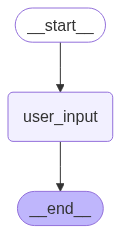

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())